In [162]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data Prep & Review

In [163]:
# reading the files for the analysis
cityOrig = pd.read_csv('city_data.csv')
rideOrig = pd.read_csv('ride_data.csv')

In [164]:
cityOrig.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [165]:
rideOrig.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [166]:
# combine the data into a single data set
combo = pd.merge(cityOrig, rideOrig, on='city')
combo.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [167]:
# filtering for urban cities and calculating total rides and average fares
urban = combo.loc[(combo['type'] == 'Urban')]
# x_axis
u_totRides = urban.groupby(['city']) ['ride_id'].count()
# y_axis
u_avgFare = urban.groupby(['city']) ['fare'].mean()
# this sets the size (area) of the bubbles and to get mine to look a little closer to the homework figure, 
# I decreased size by half
u_drivers = urban.groupby(['city']) ['driver_count'].sum() / 2

urban.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


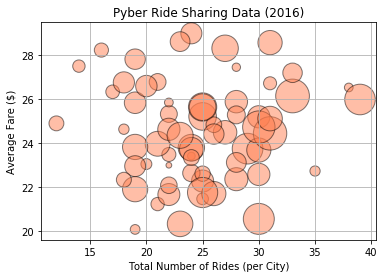

In [168]:
# plotting the urban data to test results
urban_plt = plt.scatter(u_totRides, u_avgFare, s=u_drivers, alpha=.5, color='coral',edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show(urban_plt)

In [169]:
# filtering for suburban cities and calculating total rides and average fares
burbs = combo.loc[(combo['type'] == 'Suburban')]
# x_axis
s_totRides = burbs.groupby(['city']) ['ride_id'].count()
# y_axis
s_avgFare = burbs.groupby(['city']) ['fare'].mean()
# this sets the size (area) of the bubbles and to get mine to look a little closer to the homework figure, 
# I decreased size by half
s_drivers = burbs.groupby(['city']) ['driver_count'].sum() / 2

burbs.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


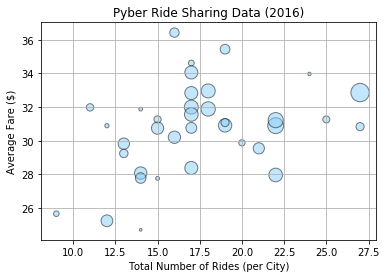

In [170]:
# plotting the suburban data to test results
burb_plt = plt.scatter(s_totRides, s_avgFare, s=s_drivers, alpha=.5, color='lightskyblue',edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show(burb_plt)

In [171]:
# filtering for rural cities and calculating total rides and average fares
rural = combo.loc[(combo['type'] == 'Rural')]
# x_axis
r_totRides = rural.groupby(['city']) ['ride_id'].count()
# y_axis
r_avgFare = rural.groupby(['city']) ['fare'].mean()
# this sets the size (area) of the bubbles and to get mine to look a little closer to the homework figure, 
# I decreased size by half
r_drivers = rural.groupby(['city']) ['driver_count'].sum() / 2

rural.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


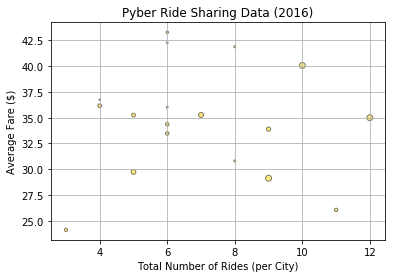

In [172]:
# plotting the rural data to test results
rural_plt = plt.scatter(r_totRides, r_avgFare, s=r_drivers, alpha=.5, color='gold',edgecolors='black')
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
plt.grid()
plt.show(rural_plt)

# Bubble Plot of Ride Sharing Data

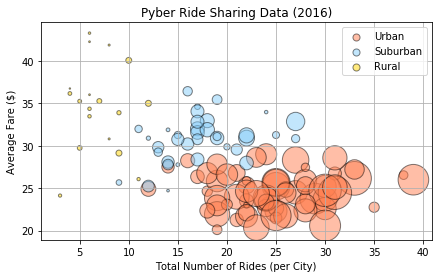

In [173]:
# 6th time is a charm??? Holy crap, I finally got this to cooperate!!!
# plotting multiple plots on one graph

# creates a new figure
fig = plt.figure(figsize=(7,4))
# adds a subplot to the current figure
ax1 = fig.add_subplot(111)
# creates the contents of the scatter plot with each set of data tested above
ax1.scatter(u_totRides, u_avgFare, s=u_drivers, alpha=0.5, c='coral', edgecolors='black', label='Urban')
ax1.scatter(s_totRides, s_avgFare, s=s_drivers, alpha=0.5, c='lightskyblue', edgecolors='black', label='Suburban')
ax1.scatter(r_totRides, r_avgFare, s=r_drivers, alpha=0.5, c='gold', edgecolors='black', label='Rural')
# adds the legend
pltLegend = plt.legend(loc='upper right')
# modifies the size of the legend bubbles
pltLegend.legendHandles[0]._sizes = [50]
pltLegend.legendHandles[1]._sizes = [50]
pltLegend.legendHandles[2]._sizes = [50]
# labels
plt.xlabel("Total Number of Rides (per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2016)")
# adding the grid
plt.grid()
# save the figure
plt.savefig("ride_sharing_bubbles.png")
# showing the combined scatter plot
plt.show()



# Total Fares by City Type

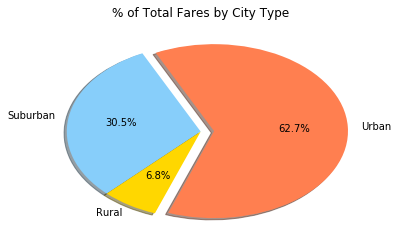

In [174]:
# John may not like pie charts, but these were so much quicker and easier than that scatter plot!
# I'm so excited, because I will get to have a day off this weekend - whoo hoo!!!

# calculating total fares by city type
u_totFares = urban.groupby(['type']) ['fare'].sum()
s_totFares = burbs.groupby(['type']) ['fare'].sum()
r_totFares = rural.groupby(['type']) ['fare'].sum()

# labels for the sections of our pie chart
labels = ['Urban', 'Suburban', 'Rural']

# the values of each section of the pie chart
sizes = [u_totFares, s_totFares, r_totFares]

# the colors of each section of the pie chart
colors = ['coral', 'lightskyblue', 'gold']

# tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# creates the pie chart based upon the values above
# automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=250)

plt.title("% of Total Fares by City Type")
# save the figure
plt.savefig("tot_fares_by_type.png")
# display the figure
plt.show()

# Total Rides by City Type

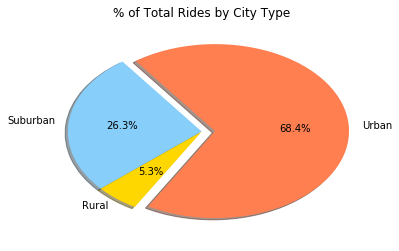

In [175]:
# calculating total rides by city type
u_totRides = urban.groupby(['type']) ['ride_id'].count()
s_totRides = burbs.groupby(['type']) ['ride_id'].count()
r_totRides = rural.groupby(['type']) ['ride_id'].count()

# labels for the sections of our pie chart
labels = ['Urban', 'Suburban', 'Rural']

# the values of each section of the pie chart
sizes = [u_totRides, s_totRides, r_totRides]

# the colors of each section of the pie chart
colors = ['coral', 'lightskyblue', 'gold']

# tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# creates the pie chart based upon the values above
# automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=240)

plt.title("% of Total Rides by City Type")
# save the figure
plt.savefig("tot_rides_by_type.png")
# display the chart
plt.show()


# Total Drivers by City Type

In [176]:
# combine the data into a single data set using full outer join
C = combo
# because z = c (I try to get this into every program I write)
Z = C.drop_duplicates(['city', 'driver_count'], keep='first')
Z.head(15)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
28,Williamsstad,59,Urban,2018-01-23 17:51:24,19.62,125986195523
51,Port Angela,67,Urban,2018-04-17 06:23:18,16.34,7120534266772
70,Rodneyfort,34,Urban,2018-02-10 23:22:03,23.44,5149245426178
93,West Robert,39,Urban,2018-02-15 04:21:47,12.28,1442502460354
124,West Anthony,70,Urban,2018-03-06 02:27:01,10.02,9396763280782
154,West Angela,48,Urban,2018-01-12 01:45:27,26.86,4820052223501
193,Martinezhaven,25,Urban,2018-03-19 15:31:26,5.30,264337981979
217,Karenberg,22,Urban,2018-03-11 17:26:12,36.15,7796761531541
234,Barajasview,26,Urban,2018-01-15 02:59:07,19.52,8268107272481


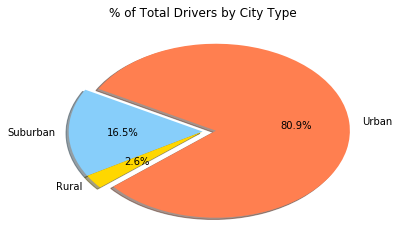

In [177]:
# filtering
urbaN = Z.loc[(new['type'] == 'Urban')]
suburbaN = Z.loc[(new['type'] == 'Suburban')]
ruraL = Z.loc[(new['type'] == 'Rural')]

# calculating total drivers by city type
u_totDrivers = urbaN.groupby(['type']) ['driver_count'].sum()
s_totDrivers = suburbaN.groupby(['type']) ['driver_count'].sum()
r_totDrivers = ruraL.groupby(['type']) ['driver_count'].sum()

# labels for the sections of our pie chart
labels = ['Urban', 'Suburban', 'Rural']

# the values of each section of the pie chart
sizes = [u_totDrivers, s_totDrivers, r_totDrivers]

# the colors of each section of the pie chart
colors = ['coral', 'lightskyblue', 'gold']

# tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# creates the pie chart based upon the values above
# automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=220)

plt.title("% of Total Drivers by City Type")
# save the figure
plt.savefig("tot_drivers_by_type.png")
# display the chart
plt.show()